## Implementation of a simple linear regression model using scikit-learn

# Loading the data into a Pandas Dataframe

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), county name ('Country')

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('data.csv')

In [11]:
data.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


In [12]:
data.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


# Plotting the graph between CrimeRate and HousePrice

In [13]:
import hvplot.pandas

In [14]:
data.hvplot(x = 'CrimeRate' , y = 'HousePrice' , kind = 'scatter')

:Scatter   [CrimeRate]   (HousePrice)

### We observe that there is a data point with CrimeRate = 366.100 and observe the effect of this datapoint in the linear regression model
### Let us generate two different linear regression models and observe the change due to high-leverage points

# Fit the simple regression model using CrimeRate as the feature

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing, svm 
from sklearn.linear_model import LinearRegression 

In [16]:
reg = LinearRegression()

In [18]:
x = data[['CrimeRate']]
y = data['HousePrice']

In [19]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Let's see what our fit looks like

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

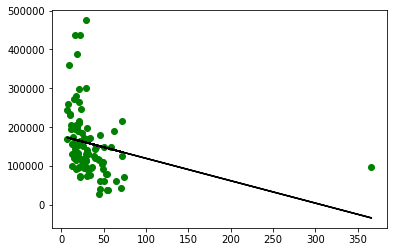

In [21]:
plt.scatter(x,y,color='green')
plt.plot(x,reg.predict(x) , color = 'k')

Center City with CrimeRate = 366.100 is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

# Remove Center City ( CrimeRate = 366.100 ) and redo the analysis

In [22]:
newdata = data
newdata.drop(newdata[newdata.CrimeRate>336].index , inplace = True)

In [24]:
newdata.hvplot(x = 'CrimeRate' , y = 'HousePrice' , kind = 'scatter')

:Scatter   [CrimeRate]   (HousePrice)

### Refit our simple regression model on this modified dataset:


In [25]:
newreg = LinearRegression()

In [27]:
x = newdata[['CrimeRate']]
y = newdata['HousePrice']

In [28]:
newreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Looking at the new fit:

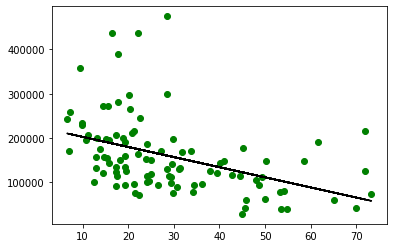

In [29]:
plt.scatter(x,y,color='green')
plt.plot(x,newreg.predict(x) , color = 'k')

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [30]:
print(reg.coef_)
print(reg.intercept_)

[-576.90812768]
176629.40810695427


In [31]:
print(newreg.coef_)
print(newreg.intercept_)

[-2288.68942995]
225233.5518390038


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different!

### High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

### Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

## Plotting the two models
Confirm the above calculations by looking at the plots. The orange line is the model trained removing Center City, and the green line is the model trained on all the data. Notice how much steeper the green line is, since the drop in value is much higher according to this model.

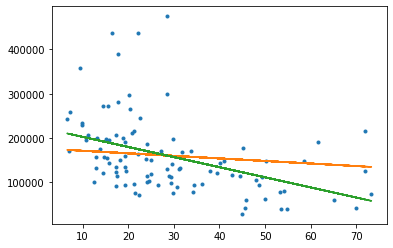

In [33]:
plt.plot(newdata['CrimeRate'], newdata['HousePrice'], '.',
         newdata['CrimeRate'], reg.predict(x), '-',
         newdata['CrimeRate'], newreg.predict(x), '-')